In [54]:
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter

from matplotlib import pyplot as plt
import numpy as np

from pymatgen.ext.matproj import MPRester
with MPRester("Os4JHJeA2G7FbSIy4") as m:

    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-568662")

print("Le matériau analysé est le BaCl2")

Le matériau analysé est le BaCl2


# Informations sur la bande interdite

In [105]:
print("( L'énergie de Fermi est de :", bandstructure.efermi, "eV )", "\n")
print("Informations sur la bande interdite :", bandstructure.get_band_gap())
print("Donc, l'énergie de la bande interdite est de 5.4291 eV et elle est indirecte.")

( L'énergie de Fermi est de : -0.48196815 eV ) 

Informations sur la bande interdite : {'direct': False, 'energy': 5.4291, 'transition': 'X-\\Gamma'}
Donc, l'énergie de la bande interdite est de 5.4291 eV et elle est indirecte.


# Graphique des bandes d'énergies contenant la bande interdite en jaune

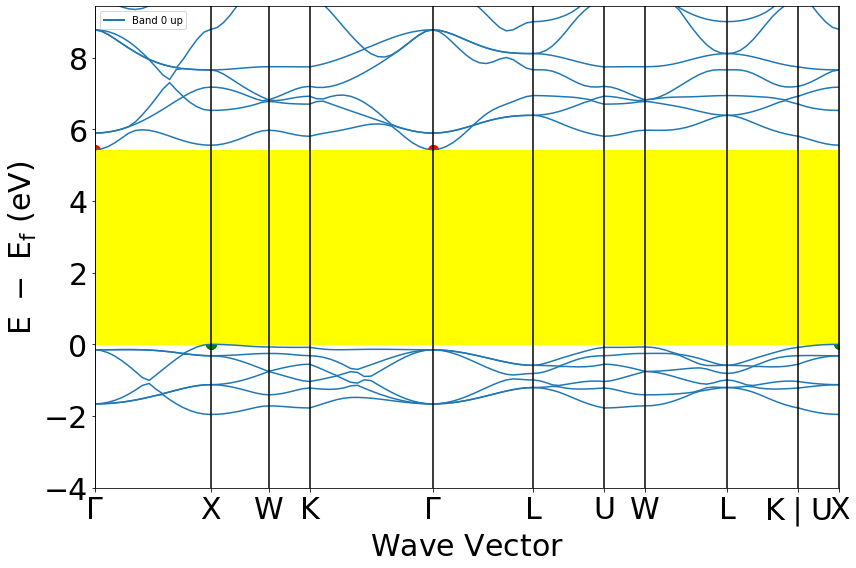

In [103]:
bs = BSPlotter(bandstructure)
# vbm_cbm_marker permet d'indiquer la position du :
# vbm = valence band maximum, en demi-cercle vert
# cbm = conduction band minimum, en demi-cercle rouge
im = bs.get_plot(vbm_cbm_marker = True)
# les donnees contenues dans le graphe
data = bs.bs_plot_data()
ticks = data.get("ticks")
# dessin de la bande interdite
im.fill_between(ticks.get("distance"), 0, gap.get("energy"), color ='yellow')

im.show()

In [166]:
# Recherche de l'index des bandes vbm et cbm
vbm = bandstructure.get_vbm()
cbm = bandstructure.get_cbm()
print(vbm["band_index"])
print("La bande de valence contenant le maximum est la 11ème bande. On dira que c'est la dernière bande de valence", "\n")
print(cbm["band_index"])
print("La bande de conduction contenant le minimum est la 12ème bande. On dira que c'est la première bande de conduction")

defaultdict(<class 'list'>, {<Spin.up: 1>: [11]})
La bande de valence contenant le maximum est la 11ème bande. On dira que c'est la dernière bande de valence 

defaultdict(<class 'list'>, {<Spin.up: 1>: [12]})
La bande de conduction contenant le minimum est la 12ème bande. On dira que c'est la première bande de conduction


# Calcul des max et min de dispersions

In [152]:
# Initialisation des pentes
dEdk_val = []
dEdk_cond = []
# nombre de frontières de chemin
fr = len(data["distances"])

for i in range(fr) :
    # les distances entre les frontières
    dk = data["distances"][i][-1]-data["distances"][i][0]
    # data["energy"]["1"][numéro du chemin][numéro de la bande][indice dans la liste]
    dE_val = data["energy"]["1"][i][11][-1]-data["energy"]["1"][i][11][0]
    dE_cond = data["energy"]["1"][i][12][-1]-data["energy"]["1"][i][12][0]
    
    dEdk_val.append(abs(dE_val/dk))
    dEdk_cond.append(abs(dE_cond/dk))

In [163]:
print("Je trouve le max et min de dispersion pour la dernière bande de valence dans les donnees suivantes :")
print(dEdk_val)

Je trouve le max et min de dispersion pour la bande de valence dans les donnees suivantes :
[0.18017776949955588, 0.17321608750841402, 0.035710089644127266, 0.07631502023635765, 0.5906369861653914, 0.967468328704279, 0.03571008964412724, 0.8557071948368563, 0.967468328704284, 0.2806746298197232]


In [161]:
print("Je trouve le max et min de dispersion pour la première bande de conduction dans les donnees suivantes :")
print(dEdk_cond)

Je trouve le max et min de dispersion pour la bande de conduction dans les donnees suivantes :
[0.14914518706446578, 0.9883228535221225, 0.5640191728838845, 0.4185089010629408, 1.3103012447410776, 1.1281671110463174, 0.564019172883884, 0.6950117914382816, 1.1281671110463232, 0.833680410570354]


# Représentation graphique

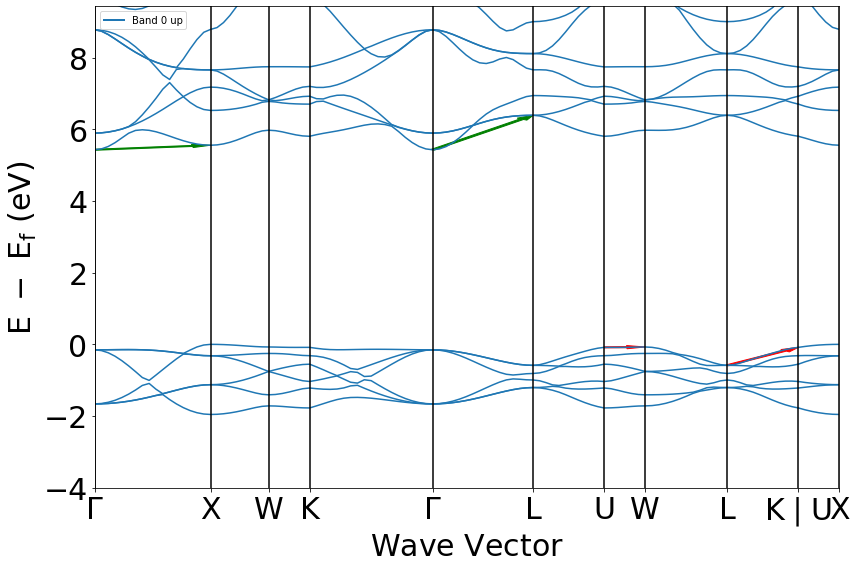

Le max et min de dispersion pour la bande de valence sont indiqués par les flèches rouges
Le max et min de dispersion pour la bande de conduction sont indiqués par les flèches vertes


In [162]:
bs = BSPlotter(bandstructure)
im = bs.get_plot()
# La plus petite dispersion de la dernière bande de valence
dx = data["distances"][6][-1]-data["distances"][6][0]
dy = data["energy"]["1"][6][11][-1]-data["energy"]["1"][6][11][0]
im.arrow(data["distances"][6][0],data["energy"]["1"][6][11][0],dx,dy,color='red',width=0.03,length_includes_head=True)
# La plus grande dispersion de la dernière bande de valence
dx = data["distances"][8][-1]-data["distances"][8][0]
dy = data["energy"]["1"][8][11][-1]-data["energy"]["1"][8][11][0]
im.arrow(data["distances"][8][0],data["energy"]["1"][8][11][0],dx,dy,color='red',width=0.03,length_includes_head=True)

# La plus petite dispersion de la première bande de conduction
dx = data["distances"][0][-1]-data["distances"][0][0]
dy = data["energy"]["1"][0][12][-1]-data["energy"]["1"][0][12][0]
im.arrow(data["distances"][0][0],data["energy"]["1"][0][12][0],dx,dy,color='green',width=0.03,length_includes_head=True)

# La plus grande dispersion de la première bande de conduction
dx = data["distances"][4][-1]-data["distances"][4][0]
dy = data["energy"]["1"][4][12][-1]-data["energy"]["1"][4][12][0]
im.arrow(data["distances"][4][0],data["energy"]["1"][4][12][0],dx,dy,color='green',width=0.03,length_includes_head=True)

im.show()

print("Le max et min de dispersion pour la dernière bande de valence sont indiqués par les flèches rouges")
print("Le max et min de dispersion pour la première bande de conduction sont indiqués par les flèches vertes")

# Calcul des masses effectives

Pour trouver la masse effective, on part de l'équation suivante:

$$\frac{1}{m_*} = \frac{1}{\hbar^2}\frac{\mathrm d^2}{\mathrm d k^2} \left( E \right)$$
On peut la réécrire sous la forme :
$$m_* = \frac{\hbar^2}{\frac{\mathrm d^2}{\mathrm d k^2} \left( E \right)}$$

Pour déterminer la dérivée seconde de l'énergie, on suppose une dispersion parabolique. Afin d'en tirer parti, on effectue une régression polynomiale de degré 2 en prenant les valeurs de E et k au sommet de la dernière  bande de valence ou à la base de la première bande de conduction, et aux 2 points les plus proches. 

Ainsi, on a tout ce qu'il faut pour calculer la masse effective. Il suffit de prendre 2 fois le premier coefficient du polynome (résultat de la dérivée seconde), et de remettre aux bonnes unités.

In [169]:
hbar = 1.054571818*10**(-34)
eV = 1.602176563*10**(-19)
A = 10**(-10)

# pas fait